In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#folder = "/home/luigi/Documents/scripts/test_scripts/py2_scripts/example_out"
folder = "/home/luigi/Documents/scripts/test_scripts/results_2020-01-17"
alpha = -1.0
rho = -1.0
convergence_time_dict = {}
fpt_dict = {}
for dirName, subdirList, fileList in os.walk(folder):
    
    coeff = dirName.split("_")
    for c in coeff:
        if (c.startswith("rho")):
            rho=float(c.split("#")[-1])
        if(c.startswith("alpha")):
            alpha=float(c.split("#")[-1])
        
        if(rho == -1.0 or alpha == -1):
                continue
        if(not str(rho) in convergence_time_dict):
            convergence_time_dict[str(rho)] = dict()
            fpt_dict[str(rho)] = dict()
        if(not str(alpha) in convergence_time_dict[str(rho)]):
            convergence_time_dict[str(rho)][str(alpha)] = dict()
            fpt_dict[str(rho)][str(alpha)] = dict()
            
    for fileName in fileList:
        if fileName.endswith('time_results.tsv'):
            seed_num = fileName.split("_")
#             print(seed_num)

            for s in seed_num:
                if (s.startswith("seed")):
                    seed=s.split("#")[-1]
            convergence_time_dict[str(rho)][str(alpha)][seed]= dict()
            fpt_dict[str(rho)][str(alpha)][seed]= dict()
#             print(seed)
            #print(dirName+"/"+fileName)
            df = pd.read_csv(dirName+"/"+fileName, sep="\t")
            #print(df)
            times = df.values[:,1:]
#             print(times)
            c_t = np.zeros(times.shape[0])
            for idx, elem in enumerate(times):
                #print(elem[0])
                fpt_dict[str(rho)][str(alpha)][seed] = elem[0]
                if(elem[0] == 0):
                    c_t[idx] = elem[1]
                else:
                    c_t[idx] = elem.min()
            c_time = c_t.max()/10
            convergence_time_dict[str(rho)][str(alpha)][seed]= c_time

In [4]:
# convergence_time_dict

In [6]:
# fpt_dict

In [11]:
a = convergence_time_dict['0.9']['1.2'].keys()
# print(a)
a.items()

AttributeError: 'dict_keys' object has no attribute 'items'

In [21]:
# conv_time = np.fromiter(convergence_time_dict['0.9']['1.2'].values(), dtype=float)

In [9]:
import collections
def get_key(key):
    try:
        return int(key)
    except ValueError:
        return key

In [10]:
b = collections.OrderedDict(sorted(a.items(), key=lambda t: get_key(t[0])))
print(b)

AttributeError: 'dict_keys' object has no attribute 'items'

In [71]:
times = np.fromiter(b.keys(), dtype=float)
print(times)

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30.]


In [69]:
b_val = np.fromiter(b.values(), dtype=float)

print(b_val)
cumsum = np.cumsum(b_val)
print(cumsum)

[202.7 107.4 129.3 184.7 245.6 113.3  57.1 187.   54.7  58.5  70.8  48.7
 180.8  28.8 129.1  35.3 190.7  91.2  61.5 119.4  47.5  44.4  74.3 197.9
 193.2  53.1 191.   84.   56.7 180.6]
[ 202.7  310.1  439.4  624.1  869.7  983.  1040.1 1227.1 1281.8 1340.3
 1411.1 1459.8 1640.6 1669.4 1798.5 1833.8 2024.5 2115.7 2177.2 2296.6
 2344.1 2388.5 2462.8 2660.7 2853.9 2907.  3098.  3182.  3238.7 3419.3]


In [ ]:
plt.plot(times, values, linewidth=3, color='b')
plt.xlabel("Time in seconds")
plt.ylabel("proportion of discovery")
plt.title("Arena diameter: " + arena_size + "m " +
         str(number_of_robots) + " kilobots per run, " + '''str(w_displacement_run_count) +''' " runs")
plt.legend()

In [72]:
def weib_cdf(x,alpha,gamma):
    return (1 - np.exp(-np.power(x/alpha,gamma)))

In [73]:
bound_is=750000

In [80]:
# df = pd.read_csv("/home/luigi/Documents/scripts/test_scripts/py3_scripts/example_out/2020-01-16_robots#50_alpha#1.2_rho#0.6_sim/seed#1_time_results.tsv", sep="\t")
df = pd.read_csv("/home/luigi/Documents/scripts/test_scripts/py3_scripts/seed#1_time_results.tsv", sep="\t")

In [81]:
data = df.values
# print("data",data)

In [82]:
fpt = data[:,1:2]
# print(fpt)
censored = fpt.size - np.count_nonzero(fpt)
print(fpt.size, censored)

50 19


In [83]:
temp = fpt.reshape(-1)
print(temp)
temp = temp[np.argsort(temp)]
print(temp.size)
temp = temp[censored:]
print(temp.size)

[11100     0     0 10588  7657     0     0  7630  7374  7488  2681  7991
   413     0 20204     0     0     0     0   343     0  7286     0 15793
 14860 23464  8847     0 10203     0 15931     0 21800  6800  2844     0
     0 10999  4437     0  8915  4029  6717 19836 10858     0     0 12076
  5054  4916]
50
31


In [84]:
n_est=np.asarray(range(0,temp.size))[::-1] + censored
RT_sync=[]
for i in range(n_est.size):
    if len(RT_sync)==0:
        RT_sync.append((n_est[i]-1)/n_est[i])
    else:
        RT_sync.append(RT_sync[-1]*((n_est[i]-1)/n_est[i]))
F=1-np.asarray(RT_sync).reshape(-1,1)
# print(F)
popt_weibull,_= curve_fit(weib_cdf,xdata=temp,ydata=np.squeeze(F),bounds=(0,[bound_is,10]),method='trf')

In [94]:
mean = sc.gamma(1+(1./popt_weibull[1]))*popt_weibull[0]
print("mean",mean)

mean 19738.49914320249


Plot esperimento lungo

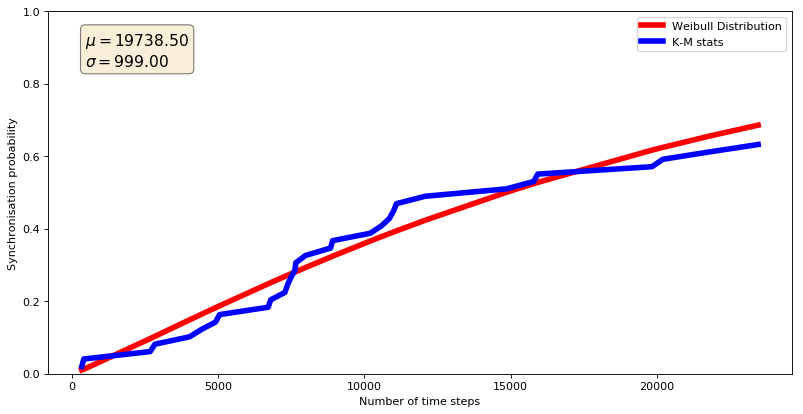

In [96]:
#fig=plt.figure(figsize=(16, 14), dpi= 80, facecolor='w', edgecolor='k')
fig, ax = plt.subplots(figsize=(12, 6), dpi= 80, facecolor='w', edgecolor='k')


textstr = '\n'.join((
    r'$\mu=%.2f$' % (mean, ),
    r'$\sigma=%.2f$' % (999, )))

# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

# place a text box in upper left in axes coords
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)


y_weib=weib_cdf(temp,popt_weibull[0],popt_weibull[1])
error_weib=np.power(y_weib-np.squeeze(F),2)
plt.plot(temp,y_weib,'r',linewidth=5,label="Weibull Distribution")
plt.plot(temp,F,'b',linewidth=5,label="K-M stats")
plt.legend()
plt.ylim(0,1)
#label="Alpha "+str(dataset[sample,1])+" Rho "+str(dataset[sample,2])+" Time of First Passage for "+str(censored)+"/"+str(uncensored)+" censored values"
#plt.title(label)
plt.xlabel("Number of time steps")
plt.ylabel("Synchronisation probability")
plt.show();


In [1]:
fig=plt.figure(figsize=(12, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(temp,error_weib,'g--',label="for Weibull Distribution")
plt.xlabel("Number of Time Steps")
plt.ylabel("Mean Square Error")
plt.legend()
plt.show();
# label="Alpha "+str(dataset[sample,1])+" Rho "+str(dataset[sample,2])+" L2 Error between Distribution and K-M Statistics for "+str(censored)+"/"+str(uncensored)+" censored values"
# plt.title(label)
# plt.close()
# pdf.savefig( fig )
# print sample,dataset[sample,:3],popt_weibull,sc.gamma(1+(1./popt_weibull[1]))*popt_weibull[0]

NameError: name 'plt' is not defined

Media della CDF della Weibull

Plot esperimento campione

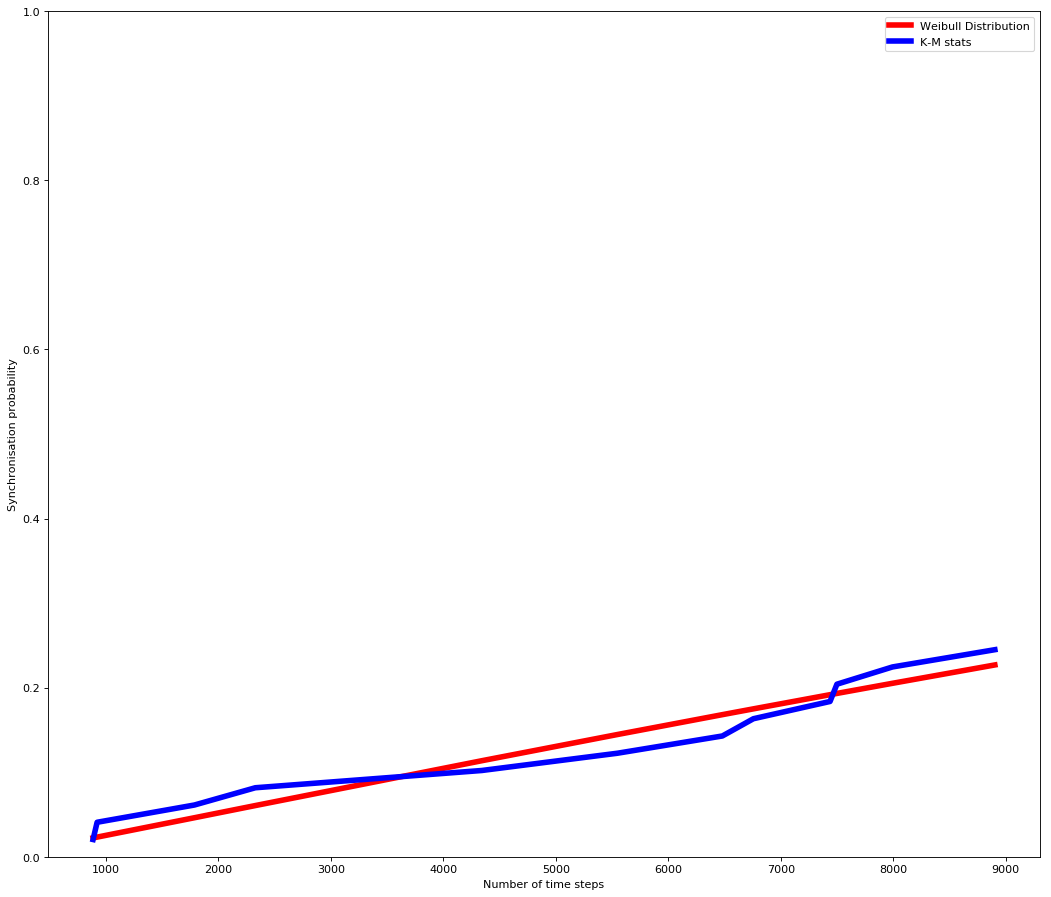

In [142]:
# fig=plt.figure()
fig=plt.figure(figsize=(16, 14), dpi= 80, facecolor='w', edgecolor='k')
y_weib=weib_cdf(temp,popt_weibull[0],popt_weibull[1])
error_weib=np.power(y_weib-np.squeeze(F),2)
plt.plot(temp,y_weib,'r',linewidth=5,label="Weibull Distribution")
plt.plot(temp,F,'b',linewidth=5,label="K-M stats")
plt.legend()
plt.ylim(0,1)
#label="Alpha "+str(dataset[sample,1])+" Rho "+str(dataset[sample,2])+" Time of First Passage for "+str(censored)+"/"+str(uncensored)+" censored values"
#plt.title(label)
plt.xlabel("Number of time steps")
plt.ylabel("Synchronisation probability")
plt.show();

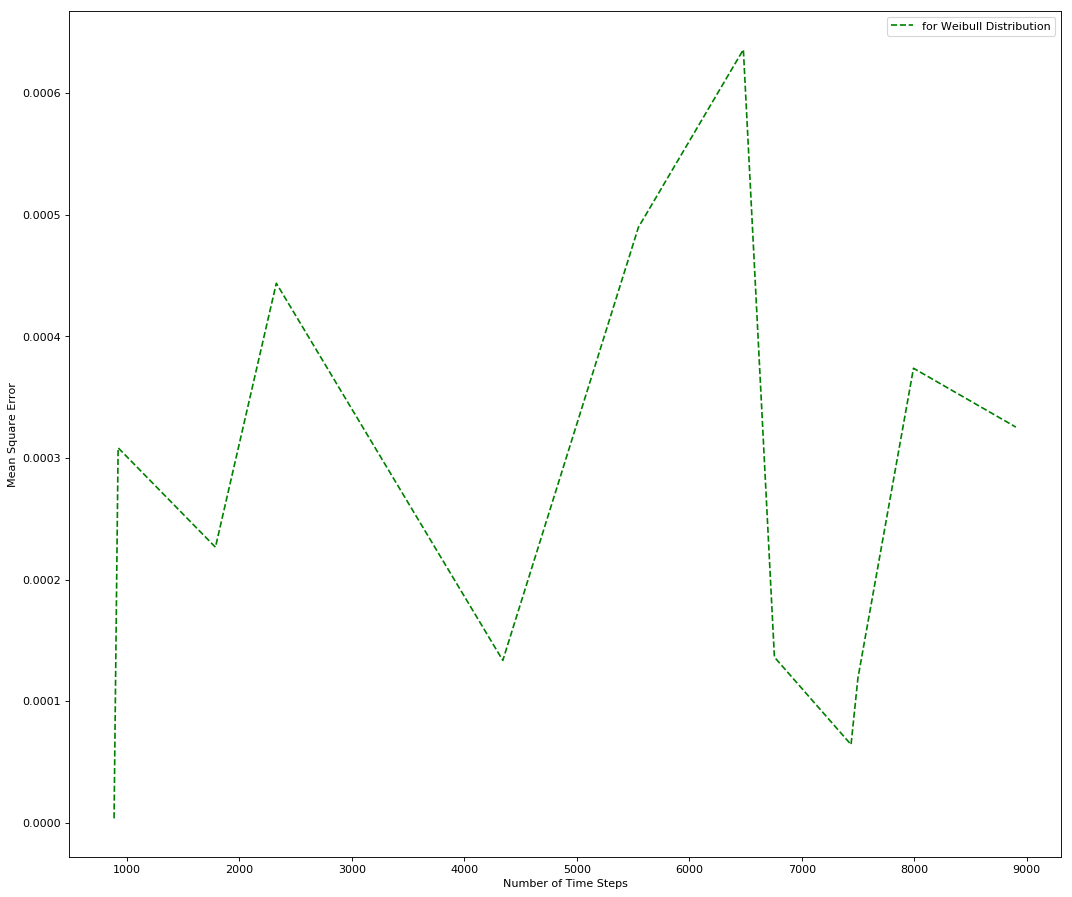

In [143]:
fig=plt.figure(figsize=(12, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(temp,error_weib,'g--',label="for Weibull Distribution")
plt.xlabel("Number of Time Steps")
plt.ylabel("Mean Square Error")
plt.legend()
plt.show();
# label="Alpha "+str(dataset[sample,1])+" Rho "+str(dataset[sample,2])+" L2 Error between Distribution and K-M Statistics for "+str(censored)+"/"+str(uncensored)+" censored values"
# plt.title(label)
# plt.close()
# pdf.savefig( fig )
# print sample,dataset[sample,:3],popt_weibull,sc.gamma(1+(1./popt_weibull[1]))*popt_weibull[0]

In [141]:
mean = sc.gamma(1+(1./popt_weibull[1]))*popt_weibull[0]
print("mean",mean)

mean 31522.049367351956
